In [1]:

import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle           
import matplotlib.pyplot as plt             
import numpy as np
import os
import cv2                                
import tensorflow as tf                
from tqdm import tqdm







In [2]:
class_names = ['buildings', 'forest', 'glacier', 'mountain','sea','street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}

nb_classes = len(class_names)

IMAGE_SIZE = (150, 150)
    

In [3]:
def load_data():
   
    
    datasets = ['C:/Users/parit/Downloads/archive/seg_train/seg_train', 'C:/Users/parit/Downloads/archive/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        
        images = []
        labels = []
        
        print("Loading {}".format(dataset))
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label = class_names_label[folder]
            
            # Iterate through each image in our folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path = os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image = cv2.imread(img_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, IMAGE_SIZE) 
                
                
                images.append(image)
                labels.append(label)
                
        images = np.array(images, dtype = 'float32')
        labels = np.array(labels, dtype = 'int32')   
        
        output.append((images, labels))

    return output

In [4]:
(train_images, train_labels), (test_images, test_labels) = load_data()

  7%|▋         | 164/2191 [00:00<00:01, 1627.51it/s]

Loading C:/Users/parit/Downloads/archive/seg_train/seg_train


 76%|███████▌  | 331/437 [00:00<00:00, 1628.48it/s]

Loading C:/Users/parit/Downloads/archive/seg_test/seg_test


100%|██████████| 501/501 [00:00<00:00, 1625.51it/s]


In [5]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=25)

In [6]:
n_train = train_labels.shape[0]
n_test = test_labels.shape[0]

print ("Number of training examples: {}".format(n_train))
print ("Number of testing examples: {}".format(n_test))
print ("Each image is of size: {}".format(IMAGE_SIZE))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150)


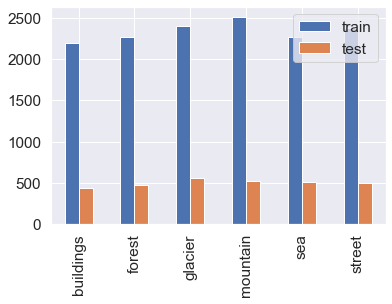

In [7]:
import pandas as pd

_, train_counts = np.unique(train_labels, return_counts=True)
_, test_counts = np.unique(test_labels, return_counts=True)
pd.DataFrame({'train': train_counts,
                    'test': test_counts}, 
             index=class_names
            ).plot.bar()
plt.show()

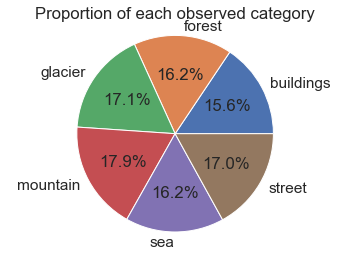

In [8]:
plt.pie(train_counts,
        explode=(0, 0, 0, 0,0,0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [9]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

In [10]:
def display_random_image(class_names, images, labels):
   
    
    index = np.random.randint(images.shape[0])
    plt.figure()
    plt.imshow(images[index])
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('Image #{} : '.format(index) + class_names[labels[index]])
    plt.show()

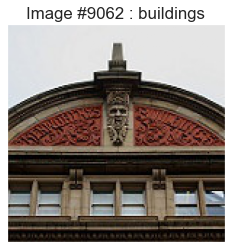

In [11]:
display_random_image(class_names, train_images, train_labels)

In [12]:
def display_examples(class_names, images, labels):
  
    
    fig = plt.figure(figsize=(20,20))
    fig.suptitle("Some examples of images of the dataset", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

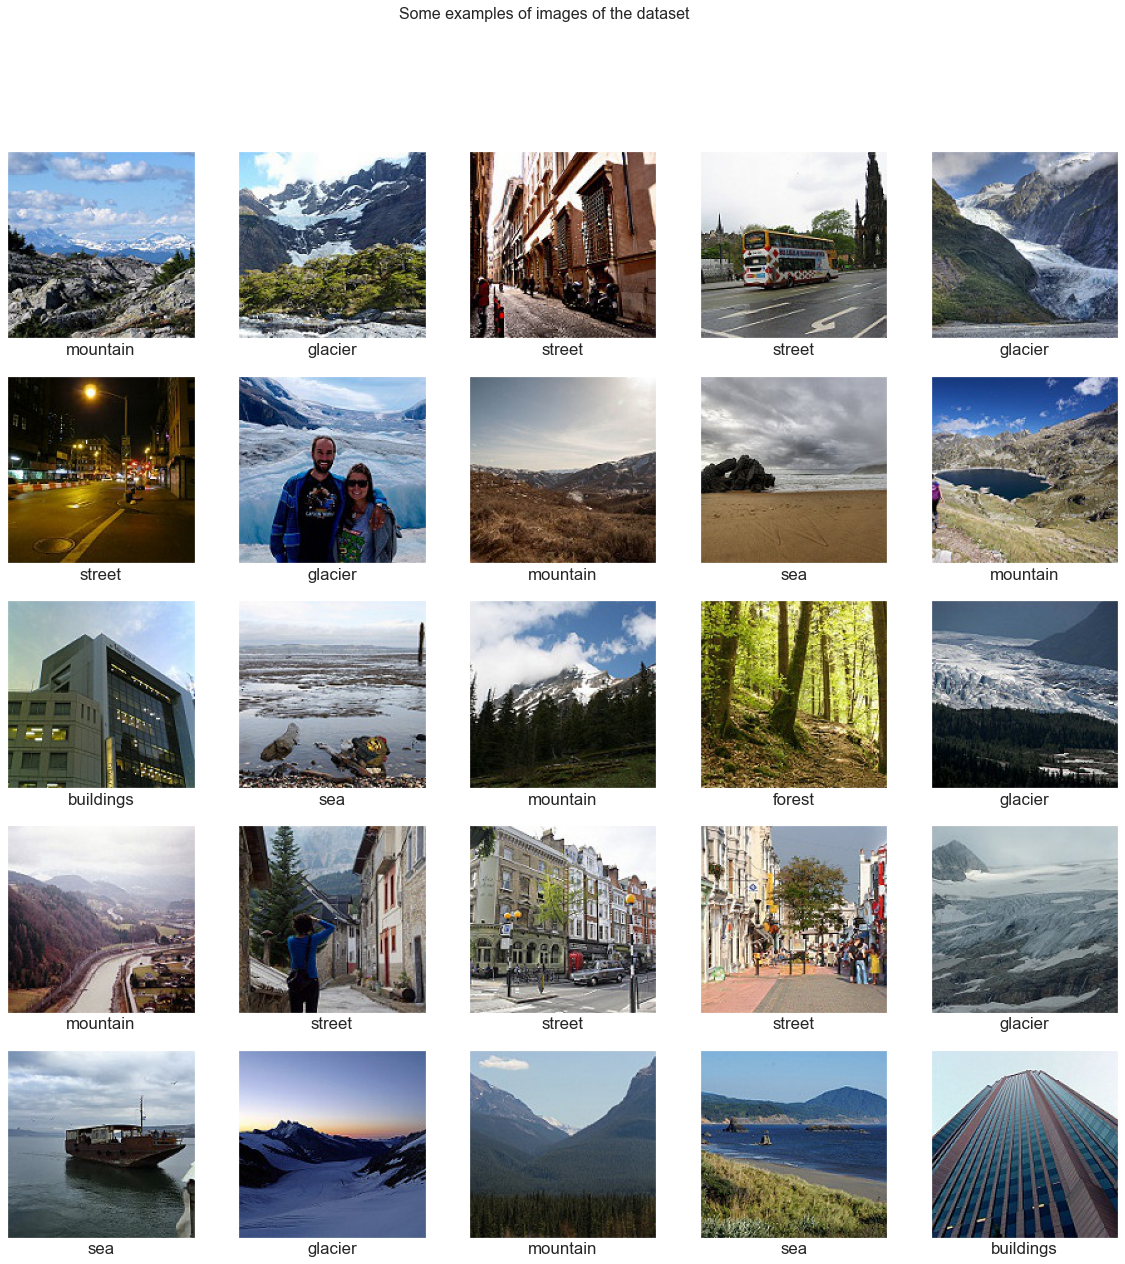

In [13]:
display_examples(class_names, train_images, train_labels)

In [14]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax)
])


In [15]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split = 0.2)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
train_loss, train_acc = model.evaluate(train_images, train_labels, verbose=2)
print("Test accuracy: ", test_acc)
print("train accuracy: ", train_acc)
model.save("model.h5")


Train on 11227 samples, validate on 2807 samples
Epoch 1/10
11227/11227 [==============================] - 11s 964us/sample - loss: 1.0463 - accuracy: 0.5977 - val_loss: 0.8376 - val_accuracy: 0.6872
Epoch 2/10
11227/11227 [==============================] - 6s 569us/sample - loss: 0.7571 - accuracy: 0.7198 - val_loss: 0.7351 - val_accuracy: 0.7139TA: 2s -
Epoch 3/10
11227/11227 [==============================] - 6s 572us/sample - loss: 0.6094 - accuracy: 0.7852 - val_loss: 0.6221 - val_accuracy: 0.7745
Epoch 4/10
11227/11227 [==============================] - 6s 571us/sample - loss: 0.5317 - accuracy: 0.8112 - val_loss: 0.5653 - val_accuracy: 0.8080ra
Epoch 5/10
11227/11227 [==============================] - 6s 573us/sample - loss: 0.4890 - accuracy: 0.8243 - val_loss: 0.5837 - val_accuracy: 0.7891
Epoch 6/10
11227/11227 [==============================] - 6s 574us/sample - loss: 0.4222 - accuracy: 0.8469 - val_loss: 0.5694 - val_accuracy: 0.7923
Epoch 7/10
11227/11227 [================

In [17]:
test_loss = model.evaluate(test_images, test_labels)

3000/3000 [==============================] - 1s 282us/sample - loss: 0.5960 - accuracy: 0.8113


In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9248)              0

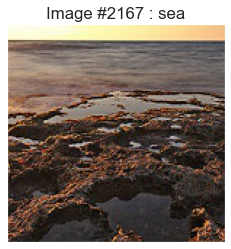

In [19]:
predictions = model.predict(test_images)     # Vector of probabilities
pred_labels = np.argmax(predictions, axis = 1) # We take the highest probability

display_random_image(class_names, test_images, pred_labels)

In [20]:
def get_image(path):
    img = cv2.imread(path)
    
    return cv2.resize(img, (200,200))

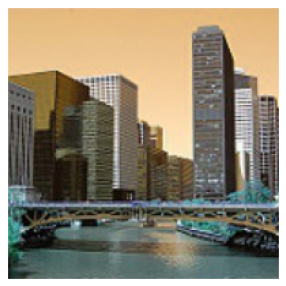

In [21]:
images = np.array([get_image("C:/Users/parit/Downloads/archive/seg_test/seg_test/buildings/20580.jpg")])
plt.figure(figsize=(5,5))
for i in range(1):
    plt.subplot(1,1,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i])
    
plt.show()

In [22]:
model = tf.keras.models.load_model("model.h5")
preds = model.predict(test_images)

def plot_image(prediction, img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    predicted_label = np.argmax(prediction)
    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
               100*np.max(prediction),
               ),
                color="blue")

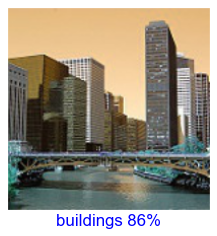

In [23]:
plt.figure(figsize=(8,12))
for i in range(1):
    # image
    plt.subplot(2, 2, 2*i+1)
    plot_image(preds[i], images[i])
    # bar chart

plt.show()